![Astrofisica Computacional](../../../logo.png)

---
## 02. Logistic Regression Algorithm. Photometric data and redshift.


Eduard Larrañaga (ealarranaga@unal.edu.co)

---


### About this notebook

In this worksheet, we will use the Logistic regression algorithm implemented before to classify a dataset with photometric information of some objects from the SDSS.

---

---

## Classification of Astronomical Objects

As an example of the **Logistic Regression** we wil consider a data set of astronomical objects from the SDSS database (DR17). It includes 100000 objects with  18 features. This dataset was obtained from [this page](https://www.kaggle.com/datasets/fedesoriano/stellar-classification-dataset-sdss17).

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

original_data = pd.read_csv("object_classification.csv")
original_data

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1.237679e+18,39.620709,-2.594074,22.16759,22.97586,21.90404,21.30548,20.73569,7778,301,2,581,1.055431e+19,GALAXY,0.000000,9374,57749,438
99996,1.237679e+18,29.493819,19.798874,22.69118,22.38628,20.45003,19.75759,19.41526,7917,301,1,289,8.586351e+18,GALAXY,0.404895,7626,56934,866
99997,1.237668e+18,224.587407,15.700707,21.16916,19.26997,18.20428,17.69034,17.35221,5314,301,4,308,3.112008e+18,GALAXY,0.143366,2764,54535,74
99998,1.237661e+18,212.268621,46.660365,25.35039,21.63757,19.91386,19.07254,18.62482,3650,301,4,131,7.601080e+18,GALAXY,0.455040,6751,56368,470


### The data

The feature `'class'` gives the typo of object; 'STAR', 'GALAXY' or 'QSO'. For this example, we will consider only the types 'STAR' and 'GALAXY' and therefore, we will define a new dataframe including samples of these types and the following features:

In [2]:
df = original_data[['u','g','r','i','z','redshift','class']][original_data['class']!='QSO']
df

,u,g,r,i,z,redshift,class
0,23.87882,22.27530,20.39501,19.16573,18.79371,0.634794,GALAXY
1,24.77759,22.83188,22.58444,21.16812,21.61427,0.779136,GALAXY
2,25.26307,22.66389,20.60976,19.34857,18.94827,0.644195,GALAXY
3,22.13682,23.77656,21.61162,20.50454,19.25010,0.932346,GALAXY
4,19.43718,17.58028,16.49747,15.97711,15.54461,0.116123,GALAXY
...,...,...,...,...,...,...,...
99995,22.16759,22.97586,21.90404,21.30548,20.73569,0.000000,GALAXY
99996,22.69118,22.38628,20.45003,19.75759,19.41526,0.404895,GALAXY
99997,21.16916,19.26997,18.20428,17.69034,17.35221,0.143366,GALAXY
99998,25.35039,21.63757,19.91386,19.07254,18.62482,0.455040,GALAXY


Note that there are only 81039 samples in this new dataframe.

In [3]:
df.describe()

,u,g,r,i,z,redshift
count,81039.000000,81039.000000,81039.000000,81039.000000,81039.000000,81039.000000
mean,22.081744,20.439013,19.416859,18.769851,18.294939,0.309225
std,35.282574,35.264528,1.921890,1.736933,35.230618,0.293630
min,-9999.000000,-9999.000000,9.822070,9.469903,-9999.000000,-0.009971
25%,20.235575,18.591925,17.725910,17.327350,17.062600,0.000311
50%,22.491240,21.122060,19.806690,19.056510,18.660530,0.247622
75%,23.954780,22.264185,20.886895,19.963560,19.513655,0.542509
max,30.660390,31.602240,29.571860,30.250090,29.383740,1.995524


The idea of this exercise is to train a Logistic Regression algorithm that gives the `'class'` of an object (classifies the sample) using the features `'u'`, `'g'`, `'r'`, `'i'`, `'z'`, `'redshift'`. First, lets verify the behavior of some variables graphically,

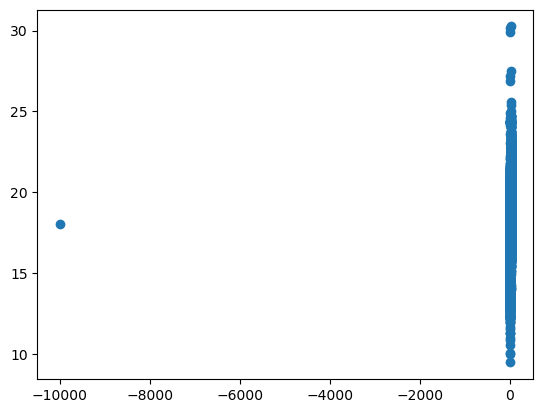

In [4]:
plt.figure()
plt.scatter(df['u'], df['i'])
plt.show()

Note that in many of the plots it is possible to identify an outlier! Hence, we need to get rid of it. First, we identify the sample,

In [5]:
outlier = df.query('u < 0 or g < 0 or r < 0 or i < 0 or z < 0')
outlier

,u,g,r,i,z,redshift,class
79543,-9999.0,-9999.0,18.1656,18.01675,-9999.0,0.000089,STAR


and drop it

In [6]:
df = df.drop(79543)
df

,u,g,r,i,z,redshift,class
0,23.87882,22.27530,20.39501,19.16573,18.79371,0.634794,GALAXY
1,24.77759,22.83188,22.58444,21.16812,21.61427,0.779136,GALAXY
2,25.26307,22.66389,20.60976,19.34857,18.94827,0.644195,GALAXY
3,22.13682,23.77656,21.61162,20.50454,19.25010,0.932346,GALAXY
4,19.43718,17.58028,16.49747,15.97711,15.54461,0.116123,GALAXY
...,...,...,...,...,...,...,...
99995,22.16759,22.97586,21.90404,21.30548,20.73569,0.000000,GALAXY
99996,22.69118,22.38628,20.45003,19.75759,19.41526,0.404895,GALAXY
99997,21.16916,19.26997,18.20428,17.69034,17.35221,0.143366,GALAXY
99998,25.35039,21.63757,19.91386,19.07254,18.62482,0.455040,GALAXY


In [7]:
df.describe()

,u,g,r,i,z,redshift
count,81038.000000,81038.000000,81038.000000,81038.000000,81038.000000,81038.000000
mean,22.205403,20.562651,19.416875,18.769860,18.418551,0.309229
std,2.376421,2.186440,1.921897,1.736941,1.708845,0.293629
min,12.101680,10.498200,9.822070,9.469903,9.612333,-0.009971
25%,20.235793,18.592075,17.725880,17.327335,17.062652,0.000311
50%,22.491290,21.122130,19.806705,19.056585,18.660610,0.247638
75%,23.954800,22.264187,20.886903,19.963585,19.513672,0.542511
max,30.660390,31.602240,29.571860,30.250090,29.383740,1.995524


### Some Plots

We will make a plot of some of the features, showing the `'class'` of each sample with a color code. Then, lets introduce a new column defining the color for 'STAR' and 'GALAXY',

In [8]:
df['classColor'] = df['class'].replace(['STAR', 'GALAXY'],['crimson', 'cornflowerblue'])
df

,u,g,r,i,z,redshift,class,classColor
0,23.87882,22.27530,20.39501,19.16573,18.79371,0.634794,GALAXY,cornflowerblue
1,24.77759,22.83188,22.58444,21.16812,21.61427,0.779136,GALAXY,cornflowerblue
2,25.26307,22.66389,20.60976,19.34857,18.94827,0.644195,GALAXY,cornflowerblue
3,22.13682,23.77656,21.61162,20.50454,19.25010,0.932346,GALAXY,cornflowerblue
4,19.43718,17.58028,16.49747,15.97711,15.54461,0.116123,GALAXY,cornflowerblue
...,...,...,...,...,...,...,...,...
99995,22.16759,22.97586,21.90404,21.30548,20.73569,0.000000,GALAXY,cornflowerblue
99996,22.69118,22.38628,20.45003,19.75759,19.41526,0.404895,GALAXY,cornflowerblue
99997,21.16916,19.26997,18.20428,17.69034,17.35221,0.143366,GALAXY,cornflowerblue
99998,25.35039,21.63757,19.91386,19.07254,18.62482,0.455040,GALAXY,cornflowerblue


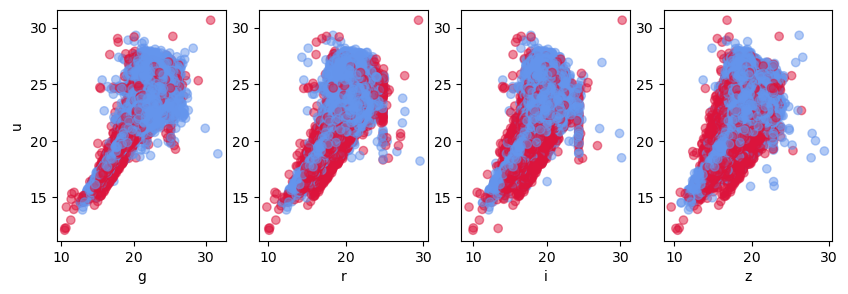

In [9]:
fig, ax = plt.subplots(1,4, figsize=(10,3))
ax[0].scatter(df['g'], df['u'], c=df['classColor'], alpha=0.5)
ax[0].set_ylabel(r'u')
ax[0].set_xlabel(r'g')
ax[1].scatter(df['r'], df['u'], c=df['classColor'], alpha=0.5)
ax[1].set_xlabel(r'r')
ax[2].scatter(df['i'], df['u'], c=df['classColor'], alpha=0.5)
ax[2].set_xlabel(r'i')
ax[3].scatter(df['z'], df['u'], c=df['classColor'], alpha=0.5)
ax[3].set_xlabel(r'z')
plt.show()

It is clear that it is not an easy task to classify the samples according to the `'class'` feature using the band information. However, we will try to train a **Logistic Regression** algorithm using this information. The first step is to define the dependent and independent variables,

In [10]:
df['classInt'] = df['class'].replace(['STAR', 'GALAXY'],[0, 1])
df

,u,g,r,i,z,redshift,class,classColor,classInt
0,23.87882,22.27530,20.39501,19.16573,18.79371,0.634794,GALAXY,cornflowerblue,1
1,24.77759,22.83188,22.58444,21.16812,21.61427,0.779136,GALAXY,cornflowerblue,1
2,25.26307,22.66389,20.60976,19.34857,18.94827,0.644195,GALAXY,cornflowerblue,1
3,22.13682,23.77656,21.61162,20.50454,19.25010,0.932346,GALAXY,cornflowerblue,1
4,19.43718,17.58028,16.49747,15.97711,15.54461,0.116123,GALAXY,cornflowerblue,1
...,...,...,...,...,...,...,...,...,...
99995,22.16759,22.97586,21.90404,21.30548,20.73569,0.000000,GALAXY,cornflowerblue,1
99996,22.69118,22.38628,20.45003,19.75759,19.41526,0.404895,GALAXY,cornflowerblue,1
99997,21.16916,19.26997,18.20428,17.69034,17.35221,0.143366,GALAXY,cornflowerblue,1
99998,25.35039,21.63757,19.91386,19.07254,18.62482,0.455040,GALAXY,cornflowerblue,1


In [18]:
Xdf = np.asarray(df[['u','g','r','i','z']])#,'redshift']])
ydf = np.asarray(df[['classInt']])

Now, we will split these sets into train and test subsets,

In [19]:
X_train, X_test, y_train, y_test = train_test_split(Xdf, ydf, random_state=413, test_size=0.2)

print("Shape of X_train : ", X_train.shape)
print("Shape of Y_train : ", y_train.shape)
print("Shape of X_test : ", X_test.shape)
print("Shape of Y_test : ", y_test.shape)

Shape of X_train :  (64830, 5)
Shape of Y_train :  (64830, 1)
Shape of X_test :  (16208, 5)
Shape of Y_test :  (16208, 1)


### Logistic Regression Algorithm


We will use the same logistic algorithm that we implement in the previous lesson,

In [20]:
class LogisticRegression():
    '''
    Logistic regression class
    '''
    def __init__(self):
        pass
    
    def sigmoid(self, Z):
        return 1/(1 + np.exp(-Z))

    def Z(self, X):
        '''
        Function to fit
        '''
        return self.b + np.dot(X,self.W)
    
    def predict(self, X):
        return self.sigmoid(self.Z(X))
    
    def cost(self, X, y):
        '''
        Cost function
        '''
        Yp = self.predict(X)
        return -(1/self.n)*np.sum(y*np.log(Yp) + (1-y)*np.log(1-Yp))
    
    def grad_cost(self, X,y):
        '''
        Gradient of the cost function
        '''
        Yp = self.predict(X)
        grad_dW = (1/self.n)*np.dot(X.T, Yp-y)
        grad_db = (1/self.n)*np.sum(Yp-y)
        return grad_dW, grad_db
    
    def fit(self, X, y):
        '''
        Optimization function
        '''
        alpha= 0.009  # Learning rate
        tol = 1e-10    # Tolerance
        np.random.seed(413)
        self.m = X.shape[1] # Number of features
        self.n = X.shape[0] # Number od samples
        
        self.W = np.zeros([self.m,1])#np.random.rand(self.m)
        self.b = 0#np.random.rand(1)
        Y = self.sigmoid(self.Z(X))

        self.history = []
        self.history.append(self.cost(X, y))
        print('Initial cost = ', self.history[0])
        
        epoch = 0 # Epochs
        epsilon = 1
        while epsilon>tol and epoch<70000:
            # Gradient
            grad_dW, grad_db = self.grad_cost(X,y)

            self.W = self.W - alpha*grad_dW
            self.b = self.b - alpha*grad_db
            
            self.history.append(self.cost(X, y))
            epsilon = abs(self.history[epoch] - self.history[epoch+1])
            epoch +=1
        
        print('Final cost = ', self.history[-1])
        print('Number of epochs = ',epoch)
    
    def accuracy(self, X, y):
        Yp = self.predict(X)
        Yp = Yp > 0.5
        Yp = np.array(Yp, dtype = 'int64')
        acc = (1 - np.sum(abs(Yp - y))/len(y))*100
        print("Accuracy of the model is : ", round(acc, 2), "%")
        
    

In [21]:
lr = LogisticRegression()

lr.fit(X_train, y_train)


print('\nThe optimized parameters are')
print('W = ', lr.W)
print('b = ', lr.b)

Initial cost =  0.6931471805599453
Final cost =  nan
Number of epochs =  44372

The optimized parameters are
W =  [[-0.28979198]
 [ 2.52220425]
 [-1.05674874]
 [-0.75794095]
 [-0.36050783]]
b =  -0.5089788586061599


/var/folders/rg/9mmttz3x0hz3mvcrk2c92x_h0000gn/T/ipykernel_20680/297289711.py:25: RuntimeWarning: divide by zero encountered in log
  return -(1/self.n)*np.sum(y*np.log(Yp) + (1-y)*np.log(1-Yp))
/var/folders/rg/9mmttz3x0hz3mvcrk2c92x_h0000gn/T/ipykernel_20680/297289711.py:25: RuntimeWarning: invalid value encountered in multiply
  return -(1/self.n)*np.sum(y*np.log(Yp) + (1-y)*np.log(1-Yp))


In [22]:
lr.accuracy(X_train, y_train)

Accuracy of the model is :  74.09 %


In [23]:
lr.accuracy(X_test, y_test)

Accuracy of the model is :  74.35 %


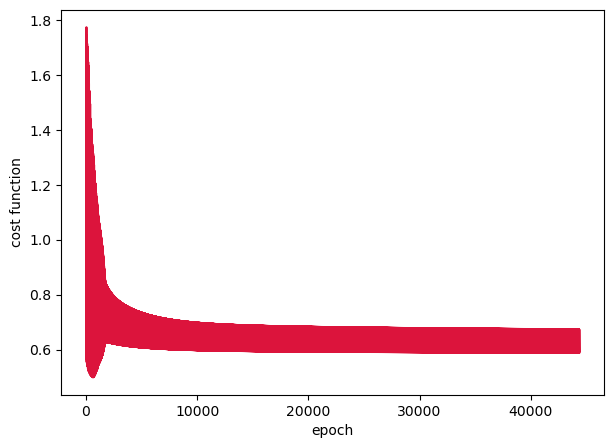

In [24]:
# Plot Training history

plt.figure(figsize=(7,5))
plt.plot(lr.history, color='crimson')
plt.ylabel(r'cost function')
plt.xlabel(r'epoch')
plt.show()

In [25]:
prediction = lr.predict(X_test)
prediction = prediction >0.5
prediction = np.array(prediction, dtype = 'int64')

confusion_matrix(y_test, prediction, normalize='all')

array([[0.01067374, 0.25438055],
       [0.00215943, 0.73278628]])

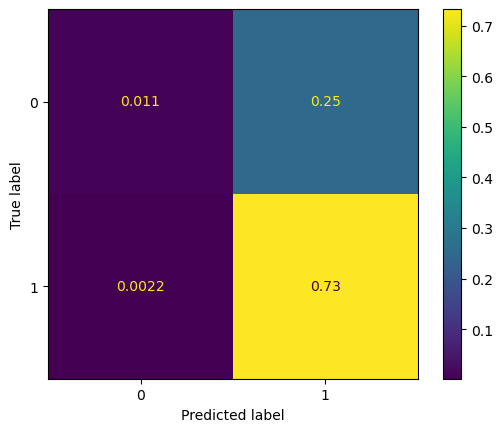

In [26]:
cm = confusion_matrix(y_test, prediction, normalize='all')
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()